In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=3.95
b=4.05

## Importing data for Amp (Phase=0)

In [3]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']
LEPR_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Amp_PreFilt).cation_sum_All
LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]
LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]
LEPR_Amp_nosuf['Phase']=0

## Importing data Cpx (phase=1)

In [4]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cs.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cs.Ca_CaMgFe
LEPR_Cpx=LEPR_Cpx_PreFilt.loc[(LEPR_Cpx_Sums.between(a, b))]
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]
LEPR_Cpx_nosuf['Phase']=1


In [5]:
%%time
LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_cs.to_clipboard(excel=True)

Wall time: 137 ms


## Importing data Opx (Phase=1)

In [6]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Opx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Opx")
    LEPR_px_input=LEPR_Opx_in['my_input']
    LEPR_Opx_PreFilt=LEPR_Opx_in['Opxs']

LEPR_Opx_cs=pt.calculate_orthopyroxene_components(opx_comps=LEPR_Opx_PreFilt)
LEPR_Opx_Sums=LEPR_Opx_cs.Cation_Sum_Opx
LEPR_CaCaMgFe=LEPR_Opx_cs.Ca_CaMgFe


LEPR_Opx=LEPR_Opx_PreFilt.loc[(LEPR_Opx_Sums.between(a, b)) ]


LEPR_Opx_nosuf=LEPR_Opx.copy()
LEPR_Opx_nosuf.columns = [col.replace('_Opx', '') for col in LEPR_Opx_nosuf.columns]

LEPR_Opx_nosuf['Phase']=1

## Importing data for Plag (Phase=2)

In [7]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Plag_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Plag")
    LEPR_px_input=LEPR_Plag_in['my_input']
    LEPR_Plag_PreFilt=LEPR_Plag_in['Plags']


LEPR_Plag=LEPR_Plag_PreFilt


LEPR_Plag_nosuf=LEPR_Plag.copy()
LEPR_Plag_nosuf.columns = [col.replace('_Plag', '') for col in LEPR_Plag_nosuf.columns]


LEPR_Plag_nosuf['Phase']=2

## Importing data for olivine (Phase = 3)

In [8]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Ol_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Ol")
    LEPR_px_input=LEPR_Ol_in['my_input']
    LEPR_Ol_PreFilt=LEPR_Ol_in['Ols']


LEPR_Ol=LEPR_Ol_PreFilt


LEPR_Ol_nosuf=LEPR_Ol.copy()
LEPR_Ol_nosuf.columns = [col.replace('_Ol', '') for col in LEPR_Ol_nosuf.columns]

LEPR_Ol_nosuf['Phase']=3

## Importing Spinel data (Phase = 4)

In [9]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Sp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cr_Sp")
    LEPR_Sp_input=LEPR_Sp_in['my_input']
    LEPR_Sp_PreFilt=LEPR_Sp_in['Sps']

LEPR_Sp=LEPR_Sp_PreFilt
LEPR_Sp_nosuf=LEPR_Sp.copy()
LEPR_Sp_nosuf.columns = [col.replace('_Sp', '') for col in LEPR_Sp_nosuf.columns]
LEPR_Sp_nosuf['Phase']=4


## Importing Oxide, phase = 5

In [10]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Ox_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Oxide")
    LEPR_Ox_input=LEPR_Ox_in['my_input']
    LEPR_Ox_PreFilt=LEPR_Ox_in['Sps']


LEPR_Ox=LEPR_Ox_PreFilt

LEPR_Ox_nosuf=LEPR_Ox.copy()
LEPR_Ox_nosuf.columns = [col.replace('_Sp', '') for col in LEPR_Ox_nosuf.columns]
LEPR_Ox_nosuf['Phase']=5


## Apatite, phase = 6

In [11]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Ap_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Apatite")
    LEPR_Ap_input=LEPR_Ap_in['my_input']
    LEPR_Ap_PreFilt=LEPR_Ap_in['my_oxides']


LEPR_Ap=LEPR_Ap_PreFilt

LEPR_Ap_nosuf=LEPR_Ap.copy()
LEPR_Ap_nosuf['Phase']=6


## Biotite N=7

In [12]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Bt_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Biotite")
    LEPR_Bt_input=LEPR_Bt_in['my_input']
    LEPR_Bt_PreFilt=LEPR_Bt_in['my_oxides']


LEPR_Bt=LEPR_Bt_PreFilt

LEPR_Bt_nosuf=LEPR_Bt.copy()
LEPR_Bt_nosuf['Phase']=7


## Quartz, N=8

In [13]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Qz_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Quartz")
    LEPR_Qz_input=LEPR_Qz_in['my_input']
    LEPR_Qz_PreFilt=LEPR_Qz_in['my_oxides']


LEPR_Qz=LEPR_Qz_PreFilt

LEPR_Qz_nosuf=LEPR_Qz.copy()
LEPR_Qz_nosuf['Phase']=8


## Garnet N=9

In [14]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Gt_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Garnet")
    LEPR_Gt_input=LEPR_Gt_in['my_input']
    LEPR_Gt_PreFilt=LEPR_Gt_in['my_oxides']


LEPR_Gt=LEPR_Gt_PreFilt

LEPR_Gt_nosuf=LEPR_Gt.copy()
LEPR_Gt_nosuf['Phase']=9


## Alk Feldspar Phase = 2

In [15]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Kspar_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Kspar")
    LEPR_px_input=LEPR_Kspar_in['my_input']
    LEPR_Kspar_PreFilt=LEPR_Kspar_in['Kspars']


LEPR_Kspar=LEPR_Kspar_PreFilt


LEPR_Kspar_nosuf=LEPR_Kspar.copy()
LEPR_Kspar_nosuf.columns = [col.replace('_Kspar', '') for col in LEPR_Kspar_nosuf.columns]


LEPR_Kspar_nosuf['Phase']=2

## Stitching different phases together

In [16]:
LEPR_Combo=pd.concat([LEPR_Cpx_nosuf, LEPR_Amp_nosuf, LEPR_Opx_nosuf,  LEPR_Plag_nosuf, 
                      LEPR_Ol_nosuf,  LEPR_Sp_nosuf, LEPR_Ox_nosuf, LEPR_Kspar_nosuf, LEPR_Ap_nosuf,
                     LEPR_Bt_nosuf, LEPR_Qz_nosuf, LEPR_Gt_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
LEPR_Y=LEPR_Combo['Phase']
LEPR_Combo_noclass=LEPR_Combo.drop(columns=['Phase', 'Sample_ID', 'NiO', 'Cr2O3', 'K2O', 'P2O5'])
LEPR_X=LEPR_Combo_noclass.values

In [17]:
np.shape(LEPR_X)

(5702, 8)

Text(0, 0.5, 'TiO2')

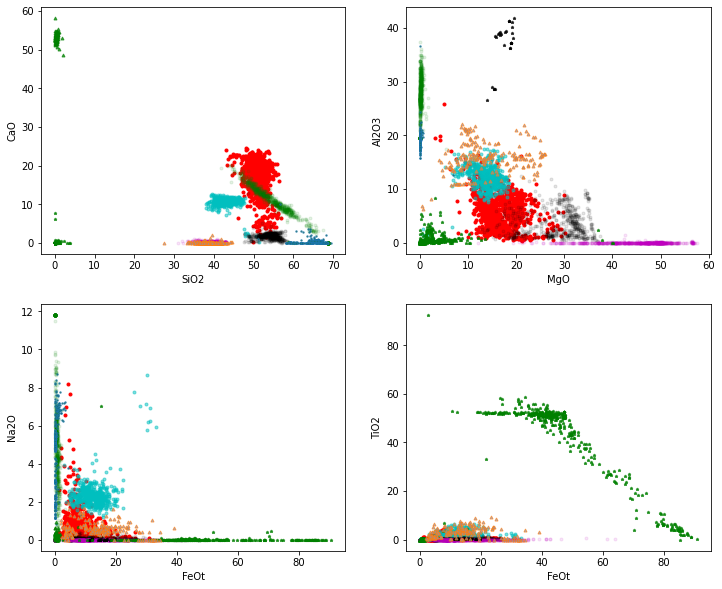

In [18]:
## Viualizing differences
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
ax0.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.c', alpha=0.5)
ax0.plot(LEPR_Opx['SiO2_Opx'], LEPR_Opx['CaO_Opx'], '.k', alpha=0.1)
ax0.plot(LEPR_Plag['SiO2_Plag'], LEPR_Plag['CaO_Plag'], '.g', alpha=0.1)
ax0.plot(LEPR_Ol['SiO2_Ol'], LEPR_Ol['CaO_Ol'], '.m', alpha=0.1)
ax0.plot(LEPR_Sp['SiO2_Sp'], LEPR_Sp['CaO_Sp'], '*k', alpha=0.7, ms=3)
ax0.plot(LEPR_Ox['SiO2_Sp'], LEPR_Ox['CaO_Sp'], '*g', alpha=0.7, ms=3)
ax0.plot(LEPR_Kspar['SiO2_Kspar'], LEPR_Kspar['CaO_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)
ax0.plot(LEPR_Ap['SiO2'], LEPR_Ap['CaO'], '^g', alpha=0.7, ms=3)
ax0.plot(LEPR_Bt['SiO2'], LEPR_Bt['CaO'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)

ax0.set_xlabel('SiO2')
ax0.set_ylabel('CaO')

ax1.plot(LEPR_Cpx['MgO_Cpx'], LEPR_Cpx['Al2O3_Cpx'], '.r')
ax1.plot(LEPR_Amp['MgO_Amp'], LEPR_Amp['Al2O3_Amp'], '.c', alpha=0.5)
ax1.plot(LEPR_Opx['MgO_Opx'], LEPR_Opx['Al2O3_Opx'], '.k', alpha=0.1)
ax1.plot(LEPR_Plag['MgO_Plag'], LEPR_Plag['Al2O3_Plag'], '.g', alpha=0.1)
ax1.plot(LEPR_Ol['MgO_Ol'], LEPR_Ol['Al2O3_Ol'], '.m', alpha=0.1)
ax1.plot(LEPR_Sp['MgO_Sp'], LEPR_Sp['Al2O3_Sp'], '*k', alpha=0.7, ms=3)
ax1.plot(LEPR_Ox['MgO_Sp'], LEPR_Ox['Al2O3_Sp'], '*g', alpha=0.7, ms=3)
ax1.plot(LEPR_Kspar['MgO_Kspar'], LEPR_Kspar['Al2O3_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)
ax1.plot(LEPR_Ap['MgO'], LEPR_Ap['Al2O3'], '^g', alpha=0.7, ms=3)
ax1.plot(LEPR_Bt['MgO'], LEPR_Bt['Al2O3'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)

ax1.set_xlabel('MgO')
ax1.set_ylabel('Al2O3')

ax2.plot(LEPR_Cpx['FeOt_Cpx'], LEPR_Cpx['Na2O_Cpx'], '.r')
ax2.plot(LEPR_Amp['FeOt_Amp'], LEPR_Amp['Na2O_Amp'], '.c', alpha=0.5)
ax2.plot(LEPR_Opx['FeOt_Opx'], LEPR_Opx['Na2O_Opx'], '.k', alpha=0.1)
ax2.plot(LEPR_Plag['FeOt_Plag'], LEPR_Plag['Na2O_Plag'], '.g', alpha=0.1)
ax2.plot(LEPR_Ol['FeOt_Ol'], LEPR_Ol['Na2O_Ol'], '.m', alpha=0.1)
ax2.plot(LEPR_Sp['FeOt_Sp'], LEPR_Sp['Na2O_Sp'], '*k', alpha=0.7, ms=3)
ax2.plot(LEPR_Ox['FeOt_Sp'], LEPR_Ox['Na2O_Sp'], '*g', alpha=0.7, ms=3)
ax2.plot(LEPR_Kspar['FeOt_Kspar'], LEPR_Kspar['Na2O_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)
ax2.plot(LEPR_Ap['FeOt'], LEPR_Ap['Na2O'], '^g', alpha=0.7, ms=3)
ax2.plot(LEPR_Bt['FeOt'], LEPR_Bt['Na2O'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)

ax2.set_xlabel('FeOt')
ax2.set_ylabel('Na2O')

ax3.plot(LEPR_Cpx['FeOt_Cpx'], LEPR_Cpx['TiO2_Cpx'], '.r')
ax3.plot(LEPR_Amp['FeOt_Amp'], LEPR_Amp['TiO2_Amp'], '.c', alpha=0.5)
ax3.plot(LEPR_Opx['FeOt_Opx'], LEPR_Opx['TiO2_Opx'], '.k', alpha=0.1)
ax3.plot(LEPR_Plag['FeOt_Plag'], LEPR_Plag['TiO2_Plag'], '.g', alpha=0.1)
ax3.plot(LEPR_Ol['FeOt_Ol'], LEPR_Ol['TiO2_Ol'], '.m', alpha=0.1)
ax3.plot(LEPR_Sp['FeOt_Sp'], LEPR_Sp['TiO2_Sp'], '*k', alpha=0.7, ms=3)
ax3.plot(LEPR_Ox['FeOt_Sp'], LEPR_Ox['TiO2_Sp'], '*g', alpha=0.7, ms=3)
ax3.plot(LEPR_Kspar['FeOt_Kspar'], LEPR_Kspar['TiO2_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)
ax3.plot(LEPR_Ap['FeOt'], LEPR_Ap['TiO2'], '^g', alpha=0.7, ms=3)
ax3.plot(LEPR_Bt['FeOt'], LEPR_Bt['TiO2'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)

ax3.set_xlabel('FeOt')
ax3.set_ylabel('TiO2')



## Just unusual phases

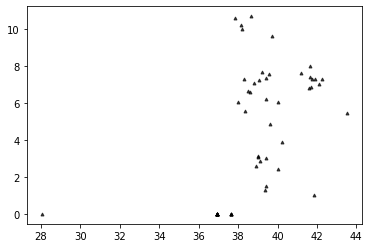

In [19]:
plt.plot(LEPR_Gt['SiO2'], LEPR_Gt['CaO'], '^k', mfc='black', alpha=0.7, ms=3)


Text(0, 0.5, 'TiO2')

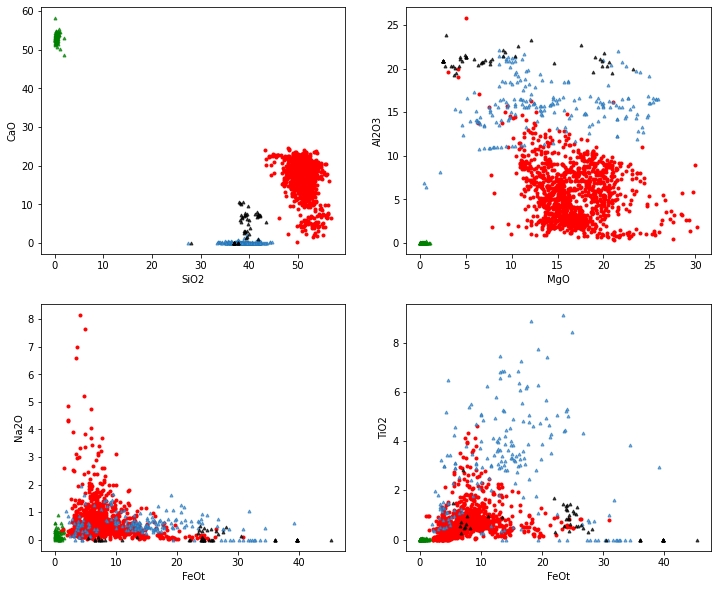

In [20]:
## Viualizing differences
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
ax0.plot(LEPR_Ap['SiO2'], LEPR_Ap['CaO'], '^g', alpha=0.7, ms=3)
ax0.plot(LEPR_Bt['SiO2'], LEPR_Bt['CaO'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)
ax0.plot(LEPR_Gt['SiO2'], LEPR_Gt['CaO'], '^k', mfc='black', alpha=0.7, ms=3)

ax0.set_xlabel('SiO2')
ax0.set_ylabel('CaO')

ax1.plot(LEPR_Cpx['MgO_Cpx'], LEPR_Cpx['Al2O3_Cpx'], '.r')
ax1.plot(LEPR_Ap['MgO'], LEPR_Ap['Al2O3'], '^g', alpha=0.7, ms=3)
ax1.plot(LEPR_Bt['MgO'], LEPR_Bt['Al2O3'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)
ax1.plot(LEPR_Gt['MgO'], LEPR_Gt['Al2O3'], '^k', mfc='black', alpha=0.7, ms=3)

ax1.set_xlabel('MgO')
ax1.set_ylabel('Al2O3')

ax2.plot(LEPR_Cpx['FeOt_Cpx'], LEPR_Cpx['Na2O_Cpx'], '.r')
ax2.plot(LEPR_Ap['FeOt'], LEPR_Ap['Na2O'], '^g', alpha=0.7, ms=3)
ax2.plot(LEPR_Bt['FeOt'], LEPR_Bt['Na2O'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)
ax2.plot(LEPR_Gt['FeOt'], LEPR_Gt['Na2O'], '^k', mfc='black', alpha=0.7, ms=3)

ax2.set_xlabel('FeOt')
ax2.set_ylabel('Na2O')

ax3.plot(LEPR_Cpx['FeOt_Cpx'], LEPR_Cpx['TiO2_Cpx'], '.r')
ax3.plot(LEPR_Ap['FeOt'], LEPR_Ap['TiO2'], '^g', alpha=0.7, ms=3)
ax3.plot(LEPR_Bt['FeOt'], LEPR_Bt['TiO2'], '^', mfc='cornflowerblue', alpha=0.7, ms=3)
ax3.plot(LEPR_Gt['FeOt'], LEPR_Gt['TiO2'], '^k', mfc='black', alpha=0.7, ms=3)

ax3.set_xlabel('FeOt')
ax3.set_ylabel('TiO2')



## Importing new data from my compilation

In [21]:
PW_Amp_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Amp")
PW_Amp_input=PW_Amp_in['my_input']
PW_Amp_PreFilt=PW_Amp_in['Amps']
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All
PW_Amp=PW_Amp_PreFilt.loc[PW_Amp_Sums.between(15.5, 16)]
PW_Amp_nosuf=PW_Amp.copy()
PW_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
PW_Amp_nosuf.columns = [col.replace('_Amp', '') for col in PW_Amp_nosuf.columns]
PW_Amp_nosuf['Phase']=0

In [22]:
PW_Cpx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Cpx")
PW_Cpx_input=PW_Cpx_in['my_input']
PW_Cpx_PreFilt=PW_Cpx_in['Cpxs']
PW_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=PW_Cpx_PreFilt)
PW_Cpx_Sums=PW_Cpx_cs.Cation_Sum_Cpx
PW_CaCaMgFe=PW_Cpx_cs.Ca_CaMgFe


PW_Cpx=PW_Cpx_PreFilt.loc[(PW_Cpx_Sums.between(a, b)) & (PW_CaCaMgFe>0.2) ]


PW_Cpx_nosuf=PW_Cpx.copy()
PW_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in PW_Cpx_nosuf.columns]

PW_Cpx_nosuf['Phase']=1


In [23]:
PW_Opx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Opx")
PW_Opx_input=PW_Opx_in['my_input']
PW_Opx_PreFilt=PW_Opx_in['Opxs']
PW_Opx_cs=pt.calculate_orthopyroxene_components(opx_comps=PW_Opx_PreFilt)
PW_Opx_Sums=PW_Opx_cs.Cation_Sum_Opx
PW_CaCaMgFe=PW_Opx_cs.Ca_CaMgFe


PW_Opx=PW_Opx_PreFilt.loc[(PW_Opx_Sums.between(a, b)) & (PW_CaCaMgFe<0.05) ]


PW_Opx_nosuf=PW_Opx.copy()
PW_Opx_nosuf.columns = [col.replace('_Opx', '') for col in PW_Opx_nosuf.columns]

PW_Opx_nosuf['Phase']=1


In [24]:
PW_Plag_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", 
                           sheet_name="Plag-Liq")
PW_Plag_input=PW_Plag_in['my_input']
PW_Plag_PreFilt=PW_Plag_in['Plags']


PW_Plag=PW_Plag_PreFilt


PW_Plag_nosuf=PW_Plag.copy()
PW_Plag_nosuf.columns = [col.replace('_Plag', '') for col in PW_Plag_nosuf.columns]

PW_Plag_nosuf['Phase']=2


In [25]:
PW_Ol_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Ol-Liq")
PW_Ol_input=PW_Ol_in['my_input']
PW_Ol_PreFilt=PW_Ol_in['Ols']


PW_Ol=PW_Ol_PreFilt


PW_Ol_nosuf=PW_Ol.copy()
PW_Ol_nosuf.columns = [col.replace('_Ol', '') for col in PW_Ol_nosuf.columns]

PW_Ol_nosuf['Phase']=3


In [26]:
PW_Combo=pd.concat([PW_Cpx_nosuf, PW_Amp_nosuf, PW_Opx_nosuf, PW_Plag_nosuf, PW_Ol_nosuf]  , axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
PW_Y=PW_Combo['Phase']
PW_Combo_noclass=PW_Combo.drop(columns=['Phase', 'Sample_ID', 'NiO', 'Cr2O3', 'K2O'])
PW_X=PW_Combo_noclass.values

In [27]:
np.shape(PW_X)

(2756, 8)

## Tutorial from https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

 - Good explanation of how it works here
    https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

In [28]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
# In my example, 0 is amphibole, 1 is cpx, 2 is Opx, 3 is Plag, 4 is Ol

In [30]:
from sklearn.preprocessing import StandardScaler
X_test_noscaled=PW_X
y_test=PW_Y

X_train_noscaled=LEPR_X
y_train=LEPR_Y

scaler = StandardScaler().fit(X_train_noscaled)
X_train_scaled = scaler.transform(X_train_noscaled)
X_test_scaled=scaler.transform(X_test_noscaled)
# from sklearn.tree import DecisionTreeClassifier
# dtree_model = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)
# svc_predictions = dtree_model.predict(X_test)

# cm = confusion_matrix(y_test, svc_predictions)

from sklearn.svm import SVC
svc_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train)
svc_predictions = svc_model_linear.predict(X_test_scaled)
  
# model accuracy for X_test  
accuracy = svc_model_linear.score(X_test_scaled, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svc_predictions)

In [31]:
accuracy

0.9996371552975326

In [32]:
len(PW_Cpx)

815

In [33]:
# 'amp', cpx+opx+pig, plag+alk, ol, sp, ox, alk
cm

array([[ 276,    1,    0,    0],
       [   0, 1220,    0,    0],
       [   0,    0,  819,    0],
       [   0,    0,    0,  440]], dtype=int64)

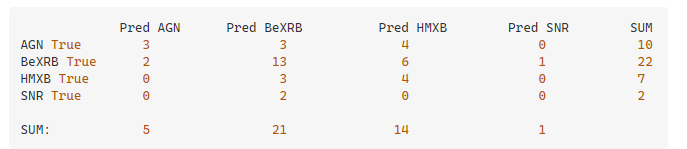

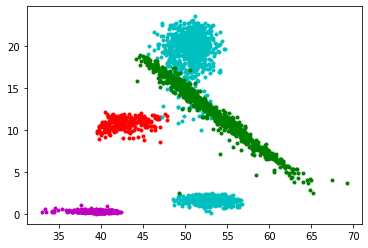

In [34]:
pred_amp_svc=svc_predictions==0
pred_px_svc=svc_predictions==1
pred_fspar_svc=svc_predictions==2
pred_ol_svc=svc_predictions==3
pred_sp_svc=svc_predictions==4
pred_ox_svc=svc_predictions==5

plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc], PW_Combo['CaO'].loc[pred_amp_svc], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc], PW_Combo['CaO'].loc[pred_px_svc], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc], PW_Combo['CaO'].loc[pred_fspar_svc], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc], PW_Combo['CaO'].loc[pred_ol_svc], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc], PW_Combo['CaO'].loc[pred_sp_svc], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc], PW_Combo['CaO'].loc[pred_ox_svc],  '*g', alpha=0.7, ms=3)



## True Cpxs -Perfect classification!?

In [35]:
## Currently none classified as Pigeonites
print('Number predicted Cpx')
sum(svc_predictions==1)

Number predicted Cpx


1221

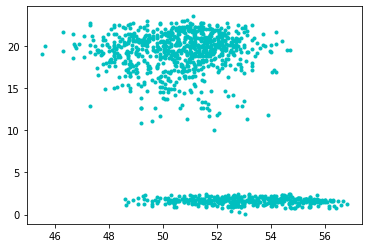

In [36]:

Actual_Cpx=PW_Combo['Phase']==1
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Cpx], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Cpx], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Cpx], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Cpx],  '*g', alpha=0.7, ms=3)


## True Plags
- Things one is cpx, and 2 are opx. This is very feasible. 

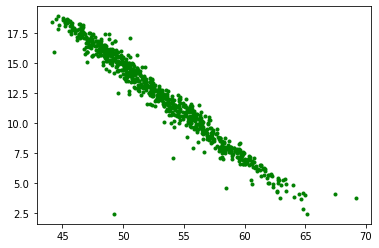

In [37]:
Actual_Plag=PW_Combo['Phase']==2
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Plag], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_px_svc&Actual_Plag], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Plag], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Plag], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Plag], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Plag],  '*g', alpha=0.7, ms=3)


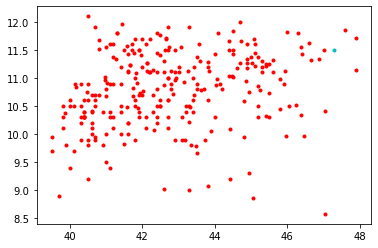

In [38]:
Actual_Amp=PW_Combo['Phase']==0
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Amp], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_px_svc&Actual_Amp], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Amp], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Amp], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Amp], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Amp],  '*g', alpha=0.7, ms=3)


In [39]:
## CHeck dataset is wrong - Shift it off. 
PW_Combo.loc[pred_pig_svc&Actual_Plag]

NameError: name 'pred_pig_svc' is not defined

##### These are from Peterman et al. And clearly not the phase they say they are...

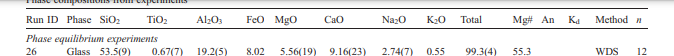

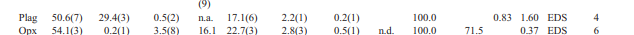

In [ ]:
PW_Combo.loc[pred_kspar_svc&Actual_Plag]

In [ ]:
pred_amp_svc=svc_predictions==0
pred_cpx_svc=svc_predictions==1
pred_opx_svc=svc_predictions==2
pred_plag_svc=svc_predictions==3
pred_ol_svc=svc_predictions==4

Actual_Amp=PW_Combo['Phase']==0
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Amp], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_cpx_svc&Actual_Amp], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_opx_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_opx_svc&Actual_Amp], '.k')
plt.plot(PW_Combo['SiO2'].loc[pred_plag_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_plag_svc&Actual_Amp], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Amp], '.m')

## Saving the variables

In [ ]:
from pickle import dump
import pickle
dump(scaler, open('scaler_MinClass.pkl', 'wb'))
dump(svc_model_linear, open('svc_model_linear_MinClass.pkl', 'wb'))

